<a href="https://colab.research.google.com/github/hamiin47/Assignment/blob/main/YB_9_20_%EC%84%B8%EC%85%98_%EB%AC%B8%EC%A0%9C_chipotle_Exercises.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Visualizing Chipotle's Data

This time we are going to pull data directly from the internet.
Special thanks to: https://github.com/justmarkham for sharing the dataset and materials.

### Step 1. Import the necessary libraries

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
import seaborn as sns

# set this so the graphs open internally
%matplotlib inline

### Step 2. Import the dataset from this [address](https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv).

### Step 3. Assign it to a variable called chipo.

In [19]:
chipo = pd.read_csv("https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv", sep='\t')

### Step 4. See the first 10 entries

In [20]:
chipo.head(10)

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98
5,3,1,Chicken Bowl,"[Fresh Tomato Salsa (Mild), [Rice, Cheese, Sou...",$10.98
6,3,1,Side of Chips,NaN,$1.69
7,4,1,Steak Burrito,"[Tomatillo Red Chili Salsa, [Fajita Vegetables...",$11.75
8,4,1,Steak Soft Tacos,"[Tomatillo Green Chili Salsa, [Pinto Beans, Ch...",$9.25
9,5,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Pinto...",$9.25


### Step 5. Create a histogram of the top 5 items bought

<ipython-input-21-9a2dd057015a>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_items.index, y=top_items.values, palette="Set2")


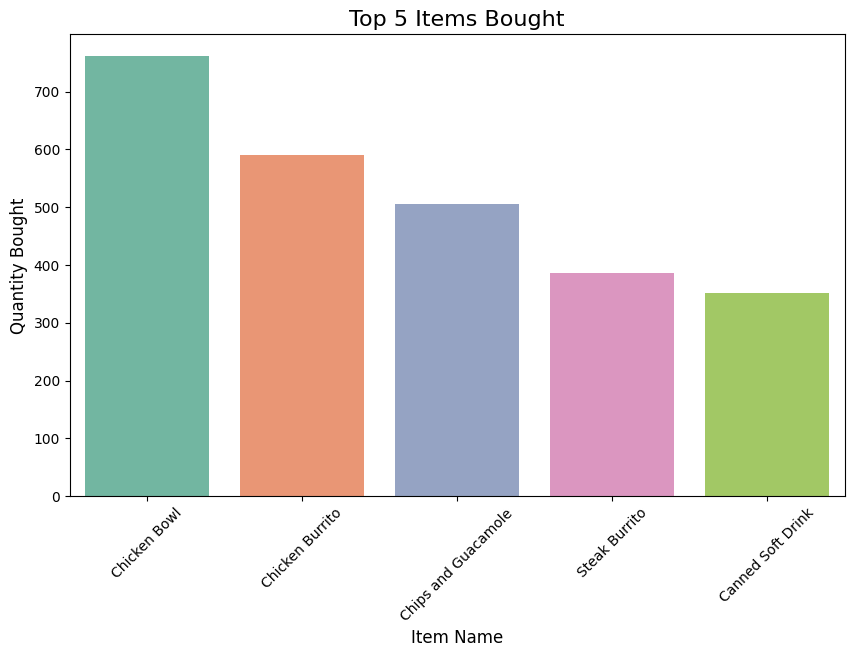

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

top_items = chipo.groupby('item_name')['quantity'].sum().sort_values(ascending=False).head(5)

plt.figure(figsize=(10,6))
sns.barplot(x=top_items.index, y=top_items.values, palette="Set2")

plt.title('Top 5 Items Bought', fontsize=16)
plt.xlabel('Item Name', fontsize=12)
plt.ylabel('Quantity Bought', fontsize=12)
plt.xticks(rotation=45)
plt.show()

### Step 6. Create a scatterplot with the number of items orderered per order price
#### Hint: Price should be in the X-axis and Items ordered in the Y-axis

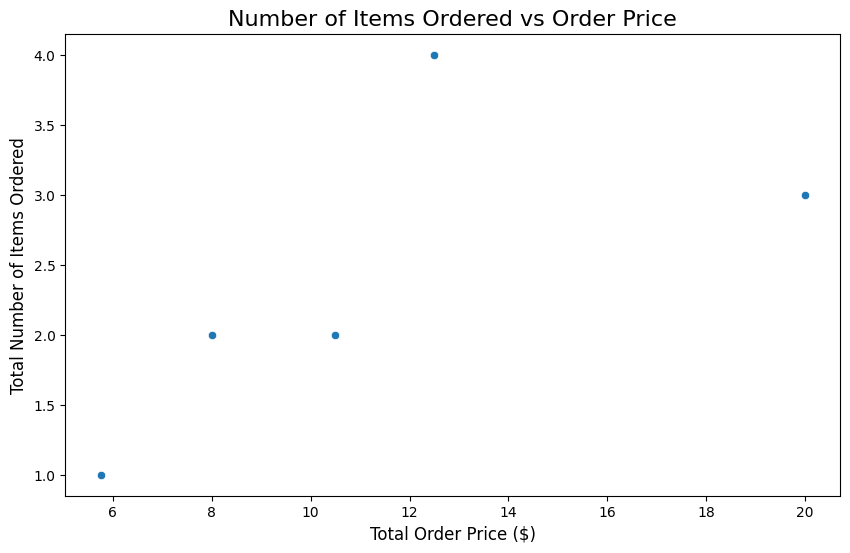

In [22]:

data = {
    'order_id': [1, 2, 3, 4, 5],
    'quantity': [2, 3, 1, 4, 2],
    'item_price': ['$10.50', '$20.00', '$5.75', '$12.50', '$8.00']
}

chipo = pd.DataFrame(data)

chipo['item_price'] = chipo['item_price'].str.replace('$', '').astype(float)

order_data = chipo.groupby('order_id').agg(
    total_items=('quantity', 'sum'),        # 개수
    total_price=('item_price', 'sum')       # 가격
).reset_index()

plt.figure(figsize=(10,6))
sns.scatterplot(x='total_price', y='total_items', data=order_data)

plt.title('Number of Items Ordered vs Order Price', fontsize=16)
plt.xlabel('Total Order Price ($)', fontsize=12)
plt.ylabel('Total Number of Items Ordered', fontsize=12)
plt.show()



### Step 7. BONUS: Create a question and a graph to answer your own question.

<ipython-input-24-92cfd74a0805>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.pointplot(x=top_items.index, y=top_items.values, palette="Set2")


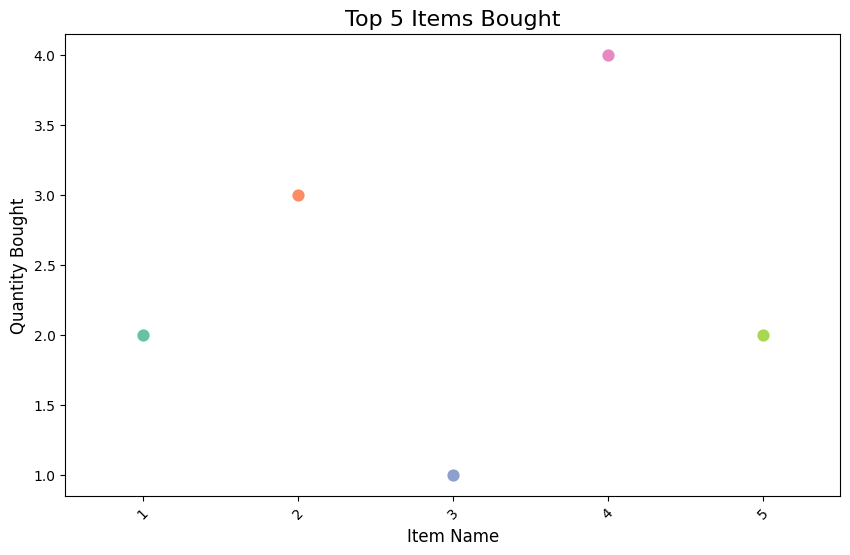

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

top_items = chipo.groupby('order_id')['quantity'].sum().sort_values(ascending=False).head(5)

plt.figure(figsize=(10,6))
sns.pointplot(x=top_items.index, y=top_items.values, palette="Set2")

plt.title('Top 5 Items Bought', fontsize=16)
plt.xlabel('Item Name', fontsize=12)
plt.ylabel('Quantity Bought', fontsize=12)
plt.xticks(rotation=45)
plt.show()